In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Import the training data set

In [4]:
df_train =pd.read_excel("C:\\Users\\Bharat\\Desktop\\Dow\\Dow_Train_dataset.xlsx") 

In [6]:
df_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [25]:
train = df_train.iloc[:,1:2].values

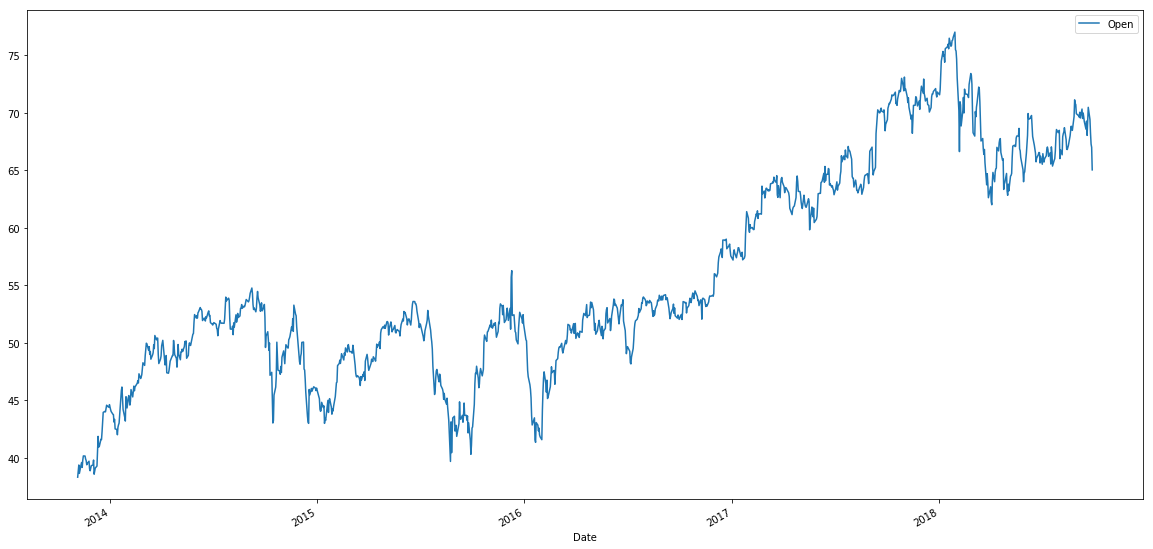

In [14]:
df_train.plot(x='Date',y='Open',figsize=(20,10))

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
sc = MinMaxScaler()

In [26]:
train_scaled = sc.fit_transform(train)

In [36]:
X_train = []
y_train = []
for i in range(60, len(train_scaled)):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [40]:
X_train

array([[0.        , 0.01369504, 0.02739021, ..., 0.18087857, 0.17881144,
        0.15555557],
       [0.01369504, 0.02739021, 0.00852718, ..., 0.17881144, 0.15555557,
        0.18346249],
       [0.02739021, 0.00852718, 0.02816538, ..., 0.15555557, 0.18346249,
        0.17751937],
       ...,
       [0.7031008 , 0.72687336, 0.70801042, ..., 0.83100789, 0.80387603,
        0.7726099 ],
       [0.72687336, 0.70801042, 0.71524553, ..., 0.80387603, 0.7726099 ,
        0.74832045],
       [0.70801042, 0.71524553, 0.7222222 , ..., 0.7726099 , 0.74832045,
        0.74108533]])

In [50]:
# Reshaping the Dataset
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [52]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [53]:
# Build the RNN Network
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [54]:
# Compile the Network
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [55]:
# Fit the Model
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1174/1174 [==============================] - 11s 9ms/step - loss: 0.0463
Epoch 2/100
1174/1174 [==============================] - 6s 6ms/step - loss: 0.0077
Epoch 3/100
1174/1174 [==============================] - 6s 5ms/step - loss: 0.0063
Epoch 4/100
1174/1174 [==============================] - 6s 5ms/step - loss: 0.0062
Epoch 5/100
1174/1174 [==============================] - 6s 5ms/step - loss: 0.0057
Epoch 6/100
1174/1174 [==============================] - 6s 5ms/step - loss: 0.0061
Epoch 7/100
1174/1174 [==============================] - 6s 5ms/step - loss: 0.0056
Epoch 8/100
1174/1174 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 9/100
1174/1174 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 10/100
1174/1174 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 11/100
1174/1174 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 12/100
1174/1174 [==============================] - 6s 5ms/step - l

1174/1174 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 98/100
1174/1174 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 99/100
1174/1174 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 100/100
1174/1174 [==============================] - 6s 5ms/step - loss: 0.0013


In [56]:
df_test = pd.read_excel("C:\\Users\\Bharat\\Desktop\\Dow\\Dow_test_dataset.xlsx")

In [57]:
test = df_test.iloc[:,1:2].values

In [58]:
# Predict the test data set
df_total = pd.concat((df_train['Open'], df_test['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, (len(df_test)+60)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

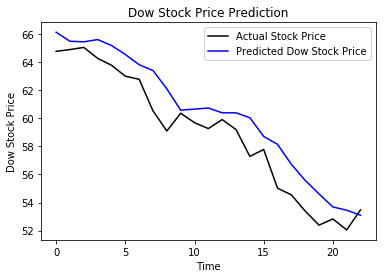

In [60]:
plt.plot(test, color = 'black', label = 'Actual Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Dow Stock Price')
plt.title('Dow Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Dow Stock Price')
plt.legend()
plt.show()